# Contenido.
1. Introducción
2. Descarga y preparación de datos.
    - 2.1 Importacion de datos.
    - 2.2 Exploracion de datos.
    - 2.3 Enriquecer los datos.
3. Informes y métricas de los productos.
    - 3.1 ¿Cuántas personas lo usan cada dia, semana y mes?
    - 3.2 ¿Cuántas sesiones hay por dia, por semana y por mes?
    - 3.3 ¿Cuál es la duración de cada sesión?
    - 3.4 ¿Con qué frecuencia los usuarios regresan?
4. Informes y métricas de las ventas.
    - 4.1 ¿Cuándo la gente empieza a comprar?
    - 4.2 ¿cuántos pedidos hacen durante un periodo de tiempo dado?
    - 4.3 ¿Cuál es el tamaño promedio de compra?
    - 4.4 ¿Cuánto dinero traen? (ltv)
5. Informes y métricas de marketing
    - 5.1 ¿Cuánto dinero se gasto?
    - 5.2 ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?.
    - 5.3 ¿Cuán rentables erán las inversiones? (ROMI)
6. Conclusión
    
    

## Introducción.

Estamos trabajando para Y.Afisha, que es una empresa que ayuda a usuarios a enconrar y comprar billetes para eventos de entretención y nuestro objetivo con este proyecto es optimizar los gastos de marketing, para ello vamos a investigar: como la gente usa el producto, cuándo empiezan a comprar, cuánto dinero trae cada cliente y como pagan. analizando las métricas de negocio de la aplicacion.

## Descarga y preparación de datos.

### Importacion de datos.


In [109]:
# Cargaremos las librerias necesarias.
import pandas as pd 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime

### Exploración de datos.

In [110]:
# carga de datos de la primera tabla.
visits_data = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])

In [111]:
# Vamos a revisar la información de nuestra primer tabla y si contiene datos duplicados.
visits_data.info()
print()
print(f'Datos duplicados: {visits_data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

Datos duplicados: 0


In [112]:
# Renombraremos las columnas.
visits_data = visits_data.rename(
    columns={'Device': 'device',
             'End Ts': 'end_ts',
             'Source Id': 'source_id',
             'Start Ts': 'start_ts',
             'Uid':'uid'})

In [113]:
# comprobando si resulto.
visits_data.head(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


La tabla visits_data tiene la información de datos sobre las visitas al sitio web y sus columnas contienen:
- `Uid:` - Identificador único del usuario.
- `Device:` - Dispositivo del usuario.
- `Start Ts:` - Fecha y hora de inicio de sesión.
- `End Ts:` - Fecha y hora de término de la sesión.
- `Source id:` - Identificador de la fuente de anuncios de la que proviene el usuario.

In [114]:
# carga de datos de la segunda tabla.
orders_data = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

In [115]:
# Veamos la informacion de nuestra segunda tabla y si contiene valores duplicados.
orders_data.info()
print()
print(f'Datos duplicados: {orders_data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

Datos duplicados: 0


In [116]:
# Renombraremos las columnas.
orders_data = orders_data.rename(
    columns= {'Buy Ts':'buy_ts',
              'Revenue':'revenue',
              'Uid':'uid'})

In [117]:
# comprobando si resulto.
orders_data.head(1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


La tabla orders_data tiene la informacion sobre los pedidos y sus columnas contiene:
- `Uid:` - Identificador único del usuario que realiza un pedido.
- `Buy Ts:` - Fecha y hora del pedido.
- `Revenue:` Ingresos de Y.Afisha de este pedido.

In [118]:
# Carga de datos de nuestra tercera tabla.
costs_data = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [119]:
# Veamos la informacion de nuestra tercera tabla y si tiene valores duplicados.
costs_data.info()
print()
print(f'Datos duplicados: {costs_data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB

Datos duplicados: 0


In [120]:
# Veamos la información general.
costs_data.head(1)

,source_id,dt,costs
0,1,2017-06-01,75.2


La tabla costs_data tiene la información de los datos sobre gastos de markenting y sus columnas contienen:
- `source_id:` - Identificador de la fuente de anuncios.
- `dt:` - Fecha.
- `costs:` - Gastos en esta fuente de anuncios en este día. 

**Conslusión intermedia.**
- Logramos ver es nuestra exploración de datos, que las tablas tenian celdas en formato object siendo fechas, estas fueron cambiadas a formato datetime64.
- Nuestra tabla no tienen valores duplicados ni valores ausentes, lo que nos indica que tenemos unas tablas bastantes limpias.
- Las columnas que estaban con mayusculas fueron cambiadas a minusculas, y tambien fueron renombradas para un mejor trabajo.


### Enrriquecer los datos.

In [121]:
# Vamos a gregas el mes los dias y semanas a nuestra primera tabla visits_data.
visits_data['day'] = visits_data['start_ts'].dt.day
visits_data['week'] = visits_data['start_ts'].astype('datetime64[W]')
visits_data['month'] = visits_data['start_ts'].astype('datetime64[M]')
visits_data['date'] = visits_data['start_ts'].dt.date.astype('datetime64[ns]')

In [122]:
# Mostraremos la tabla 
visits_data.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-14,2017-12-01,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,2018-02-15,2018-02-01,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,2017-06-29,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,2018-05-17,2018-05-01,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,2017-12-21,2017-12-01,2017-12-27


In [123]:
# agregaremos una columna con solo la fecha.
orders_data['date_buys'] = orders_data['buy_ts'].astype('datetime64[M]')

In [124]:
# Verificamos los datos.
orders_data.head(1)

,buy_ts,revenue,uid,date_buys
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01


## Informes y metricas de los productos.

### ¿Cuántas personas lo usan cada día, semana y mes?


In [125]:
# Vamos a traer el valor de la columna device de visits_data 
visits_data['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [126]:
# Vamos a calcular el promedio de las valores de device.
(visits_data['device'].value_counts() / visits_data.shape[0])*100

desktop    73.05704
touch      26.94296
Name: device, dtype: float64

In [127]:
# Realizaremos una función para calcular las metricas de uso por segmento.
def visits_total_seg(visits):
    dau = math.ceil(visits.groupby(['date']).agg({'uid': 'nunique'}).mean())
    print(f'Total diario: {dau}')
    wau = math.ceil(visits.groupby(['week']).agg({'uid': 'nunique'}).mean())
    print(f'Total semanal: {wau}')
    mau = math.ceil(visits.groupby(['month']).agg({'uid': 'nunique'}).mean())
    print(f'Total mensual: {mau}')
    return dau, wau, mau


In [128]:
# Cantidad promedio de las personas que usan la aplicación.
dau,wau,mau = visits_total_seg(visits=visits_data)

Total diario: 908
Total semanal: 5725
Total mensual: 23229


**Conclusión intermedia.**
- obtuvimos la cantidad de personas que utilizan nuestra aplicacion de manera diaria, semanal y mensual. 
- logramos obtener que el dispositivo desktop es quien tiene la mayor catidad de visitas com um 73%, y el dispositivo touch solo tiene un 27% en promedio.

In [129]:
# vamos a obtener el uso de la aplicacion segun el dispositivo touch
touch_visits = visits_total_seg(visits=visits_data.query('device == "touch"'))

Total diario: 253
Total semanal: 1638
Total mensual: 6826


In [130]:
# vamos a obtener el uso de la aplicacion segun el dispositivo desktop
desktop_visits = visits_total_seg(visits=visits_data.query('device == "desktop"'))

Total diario: 660
Total semanal: 4136
Total mensual: 16725


In [131]:
# Agrupemos por dia y con identificador único.
visits_data.groupby('date').agg(dau=('uid','nunique')).head()

,dau
date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


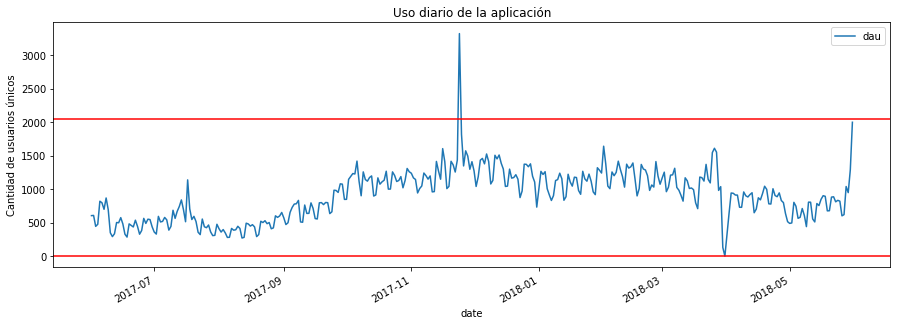

In [132]:
# gráficamos el uso diario de la aplicación a lo largo del tiempo
fig,ax = plt.subplots(figsize=(15,5))

# obtenemos los rangos intercuantilicos
Q1 = visits_data.groupby('date').agg(dau=('uid','nunique')).quantile(0.25)
Q3 = visits_data.groupby('date').agg(dau=('uid','nunique')).quantile(0.75)

IQR = Q3-Q1
ls = Q3+1.5*IQR
li = Q1-1.5*IQR

ax.set_title('Uso diario de la aplicación')
ax.set_ylabel('Cantidad de usuarios únicos')
ax = visits_data.groupby('date').agg(dau = ('uid','nunique')).plot(ax=ax)
ax.axhline(y = ls[0],color ='red')
ax.axhline(y = 0, color ='red')

In [133]:
# Agruparemos por semana con identificador unicos.
visits_data.groupby('week').agg(wau=('uid','nunique')).head()

,wau
week,
2017-06-01,4082
2017-06-08,3311
2017-06-15,2844
2017-06-22,3079
2017-06-29,3055


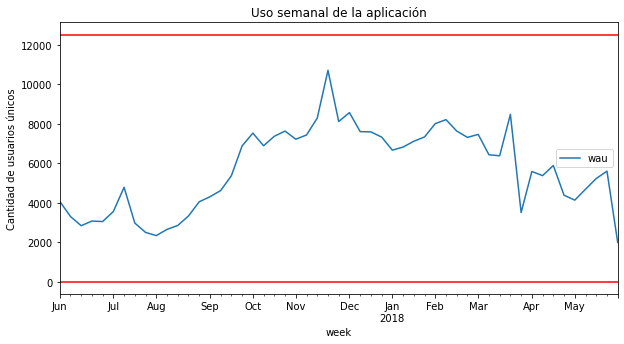

In [134]:
# gráficamos el uso semanal de la aplicación a lo largo del tiempo
fig,ax = plt.subplots(figsize=(10,5))

# obtenemos los rangos intercuantilicos
Q1 = visits_data.groupby('week').agg(wau = ('uid','nunique')).quantile(0.25)
Q3 = visits_data.groupby('week').agg(wau = ('uid','nunique')).quantile(0.75)

IQR = Q3-Q1
ls = Q3+1.5*IQR
li = Q1-1.5*IQR

ax.set_title('Uso semanal de la aplicación')
ax.set_ylabel('Cantidad de usuarios únicos')
ax = visits_data.groupby('week').agg(wau = ('uid','nunique')).plot(ax=ax)
ax.axhline(y = ls[0], color='red')
ax.axhline(y = 0, color='red')

In [135]:
# Agruparemos por mes y con identificador unicos.
visits_data.groupby('month').agg(wau=('uid','nunique')).head()

,wau
month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692


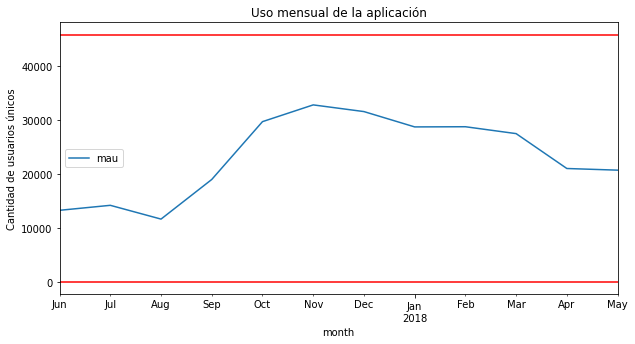

In [136]:
# gráficamos el uso semanal de la aplicación a lo largo del tiempo
fig,ax = plt.subplots(figsize=(10,5))

# obtenemos los rangos intercuantilicos
Q1 = visits_data.groupby('month').agg(mau=('uid','nunique')).quantile(0.25)
Q3 = visits_data.groupby('month').agg(mau=('uid','nunique')).quantile(0.75)

IQR = Q3-Q1
ls = Q3+1.5*IQR
li = Q1-1.5*IQR

ax.set_title('Uso mensual de la aplicación')
ax.set_ylabel('Cantidad de usuarios únicos')
ax = visits_data.groupby('month').agg(mau = ('uid','nunique')).plot(ax=ax)
ax.axhline(y= ls[0], color='red')
ax.axhline(y= 0, color='red')

**conclusion intermedia.**
- En esta sección obtuvimos el uso de la aplicacion según el dispositivo, confirmando que el dispositivo mas usado el el desktop.
- Según nuestro grafico del uso diario nos indico que durante noviembre del 2017 tuvimos una alza de visitas que sobrepaso el nivel intercuantilico. esto podria deberse a algún evento en especifico realizado en esas fechas. 
- Semanalmente se tuvo un alto uso de la aplicación del mes de octubre del 2017 a marzo del 2018. La ultima semana del mes de noviembre del 2017 se tuvo un pico en el uso de la aplicación.
- mensualmente el grafico nos confirma que en los meses de octubre del 2017 a marzo del 2018 se tuvo un alto uso de la aplicación, los meses de junio a agosto del 2017 han tenido un bajo uso de la aplicación.

### ¿Cuántas sesiones hay por dia, por semana y por mes?

In [137]:
# Crearemos una funcion para obtenr las sesiones.
def session_metrics_seg(visits_session):
    session_day = math.ceil(visits_session.groupby('date').agg({'uid':'count'}).mean())
    print(f'Total de sesiones por dia: {session_day}')
    session_week = math.ceil(visits_session.groupby('week').agg({'uid':'count'}).mean())
    print(f'Total de sesiones por semana: {session_week}')
    session_month = math.ceil(visits_session.groupby('month').agg({'uid':'count'}).mean())
    print(f'Total de sesiones por mes: {session_month}')
    return session_day,session_week,session_month

In [138]:
session_day,session_week,session_month = session_metrics_seg(visits_session = visits_data)

Total de sesiones por dia: 988
Total de sesiones por semana: 6782
Total de sesiones por mes: 29950


In [139]:
session_touch = session_metrics_seg(visits_session = visits_data.query('device=="touch"'))

Total de sesiones por dia: 267
Total de sesiones por semana: 1828
Total de sesiones por mes: 8070


In [140]:
session_desktop = session_metrics_seg(visits_session = visits_data.query('device=="desktop"'))

Total de sesiones por dia: 722
Total de sesiones por semana: 4955
Total de sesiones por mes: 21881


In [141]:
# Agruparemos las sesiones por dia y contaremos la cantidad de sesiones y la cantidad de usuarios únicos
user_session_day = visits_data.groupby('date').agg(sessions =('uid','count'), users= ('uid','nunique'))
user_session_day['session_for_user'] = user_session_day['sessions'] / user_session_day['users']
user_session_day.sample()

,sessions,users,session_for_user
date,,,
2018-02-14,1466,1333,1.099775


In [142]:
# vamos a obtener un promedio de sessiones por dia 
max = user_session_day['session_for_user'].max()
min = user_session_day['session_for_user'].min()
mean = user_session_day['session_for_user'].mean()
print(f'session maxima: {max}')
print(f'session minima: {min}')
print(f'session promedio: {mean}')

session maxima: 1.2178366978005424
session minima: 1.0
session promedio: 1.082169644003972


**conclusión intermedia**
- en esta seccion realizamos una funcion parecida a la anterior pero en este caso es para obtener la cantidad promedio de sessiones que se hacen en dias, semanas y meses.
- seguimos confirmando que la aplicación desktop es la mas utilizada.
- Realizamos una formula para obtener las sessiones por dia con usuarios unicos.
- Las sesiones diarias iniciadas por usuario está entre uno y uno punto dos, con un promedio de uno punto cero ocho, lo que nos indica que en promedio los usuarios inician sesión al menos una vez al día.


### ¿Cuál es la duración de cada sesión?

In [143]:
# Vamos a obtener la duracion en segundos de la sesion para cada registro de nuestra tabla visits_data.
visits_data['duracion_seg'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.seconds
visits_data.head(1)

,device,end_ts,source_id,start_ts,uid,day,week,month,date,duracion_seg
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-14,2017-12-01,2017-12-20,1080


In [144]:
# Duración promedio diaria de una sesion.
visits_data.groupby('date').agg({'duracion_seg': 'mean'}).mean()

duracion_seg    621.830355
dtype: float64

In [145]:
# Veamos una descripcion de los datos.
visits_data['duracion_seg'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duracion_seg, dtype: float64

<AxesSubplot:>

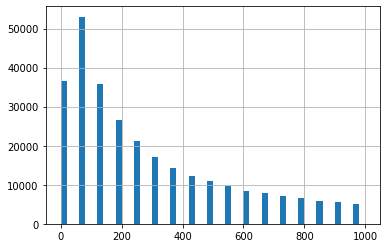

In [146]:
# Realizaremos un histograma para una mejor observacion.
visits_data['duracion_seg'].hist(bins=50, range=(0, 1000))

In [147]:
# Vamos a obtener la mode de la duracion de la sesion.
print(f"La ASL es: {visits_data['duracion_seg'].mode().values}")

La ASL es: [60]


**conclusión intermedia**
- ya que nuestro histograma nos muestra que los valores no con consecuentes no podemos obtener una media o una mediana de estos valores, por eso recurrimos a obtener la mode de los valores y  optaremos por elegir este valor como una duración promedio "razonable" de una sesión. 
- La mode nos indica que el tiempo promedio es 60 segundos tiempo suficientes para los usuarios.

### ¿Con qué frecuencia los usuarios regresan?

In [148]:
# mostramos las metricas calculadas DAU, WAU y MAU
dau,wau,mau= visits_total_seg(visits=visits_data)

Total diario: 908
Total semanal: 5725
Total mensual: 23229


In [149]:
# calculamos el 'sticky_factor'
sticky_wau = dau/wau
sticky_mau = dau/mau
print(f'{sticky_wau =: .0%}')
print(f'{sticky_mau =: .0%}')

sticky_wau = 16%
sticky_mau = 4%


**conclusión intermedia**
- El factor de adherencia nos indica que un 16% de los usuarios vuelven a usar la aplicación semanalmente y que mensualmente un 4%.

## Informe y metricas de las ventas.

### ¿Cuándo la gente empieza a comprar?

In [150]:
# Recordemos los datos de la tabla orders_data.
orders_data['month_buys'] = orders_data['buy_ts'].astype('datetime64[M]')
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   buy_ts      50415 non-null  datetime64[ns]
 1   revenue     50415 non-null  float64       
 2   uid         50415 non-null  uint64        
 3   date_buys   50415 non-null  datetime64[ns]
 4   month_buys  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


In [151]:
orders = orders_data.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
orders.columns=['uid', 'date_for_buys']
orders.head(1)

,uid,date_for_buys
0,313578113262317,2018-01-03 21:51:00


In [152]:
# obtengamos la fecha de registro.
one_registre_user = visits_data.groupby('uid')['start_ts'].min()
one_registre_user.name= 'one_user_registre'

In [153]:
# vamos a unos nuestros dateframe.
buys = pd.merge(one_registre_user, orders, on='uid')
buys.head()

,uid,one_user_registre,date_for_buys
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [154]:
# calculo de los dias que hay entre el registo y su primera compra
buys['days_for_order'] = ((buys['date_for_buys'] - buys['one_user_registre']) / np.timedelta64(1, 'D')).astype('int')
buys.head(1)

,uid,one_user_registre,date_for_buys,days_for_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106


In [155]:
# tiempo promedio.
buys['days_for_order'].mean().round()

17.0

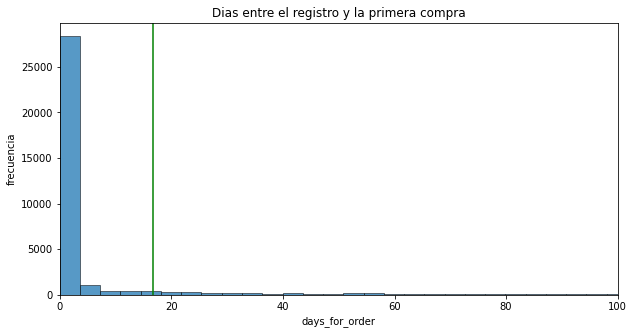

In [156]:
f,ax=plt.subplots(figsize=(10,5))

ax.set_title('Dias entre el registro y la primera compra')
ax.set_ylabel('frecuencia')
ax= sns.histplot(buys['days_for_order'], bins=100)
ax.axvline(buys['days_for_order'].mean(), color='green')
plt.xlim(0,100)
plt.show()

**conclusión intermedia**
- Para poder responder a esto tuvimos que unir nuestra primera tabla de visits_data con la segunda de orders_data 
- Utilizamos la media para obtener el resultado.
- Esta formula no indico que los dias promedios que transcurren desde que un usuario se registra hasta que compra son 17.

In [157]:
# Obtengamos el tamaño de cada cohorte segun su primera fecha de compra
buys['month_orders'] = buys['date_for_buys'].dt.date.astype('datetime64[M]')
cohort_age = buys.groupby('month_orders').agg(n_buys=('uid','count'))
cohort_age.head(1)

,n_buys
month_orders,
2017-06-01,2023


In [158]:
# Vamos a unir los dataframe.
pedidos = orders_data.merge(buys, on= 'uid')
pedidos.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys,days_for_order,month_orders
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01 00:10:00,0,2017-06-01


In [159]:
# Cambiaremos el tipo de columna.
pedidos['month_orders'] = pedidos['date_for_buys'].astype('datetime64[M]')

In [160]:
# Vamos a obtener la cantidad de pedidos.
cohortes_1 = pedidos.groupby(['month_orders','month_buys']).agg(n_orders=('uid','count')).reset_index()

In [161]:
# calculemos la edad de cada cohorte en meses
cohortes_1['age_month'] = (cohortes_1['month_buys'] - cohortes_1['month_orders'])/np.timedelta64(1,'M')
cohortes_1['age_month'] = cohortes_1['age_month'].round().astype(int)

In [162]:
# Vamos a unir los dataframe.
cohortes_1 = cohortes_1.merge(cohort_age, on='month_orders')

In [163]:
# vamos a obtener la cantidad promedio de pedidos por usuarios.
cohortes_1['orders_user'] = cohortes_1['n_orders'] / cohortes_1['n_buys'] 
cohortes_1.head(1)

,month_orders,month_buys,n_orders,age_month,n_buys,orders_user
0,2017-06-01,2017-06-01,2354,0,2023,1.163618


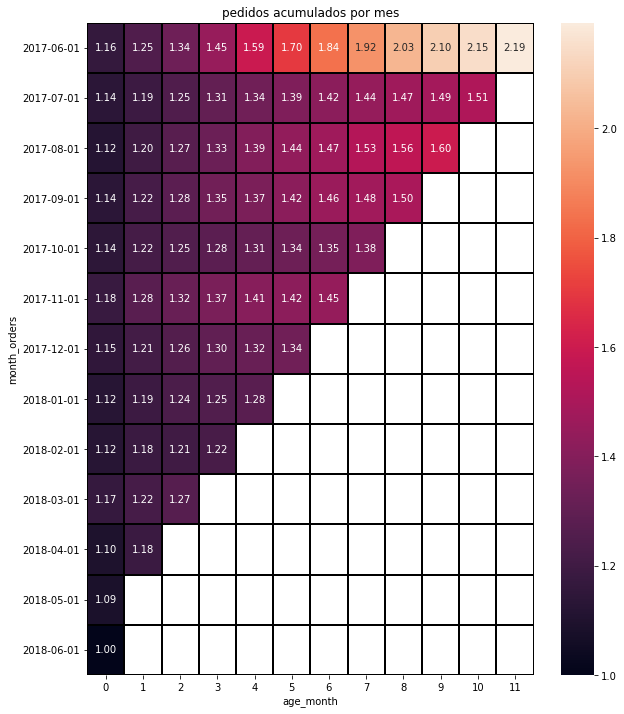

In [164]:
# Realizaremos un mapa de calor.
cohorts_map = cohortes_1.pivot_table(index='month_orders', columns= 'age_month', values='orders_user', aggfunc='mean').cumsum(axis=1)
cohorts_map.fillna('')
cohorts_map.index = cohorts_map.index.astype(str)
plt.figure(figsize=(10,12))
plt.title('pedidos acumulados por mes')
sns.heatmap(cohorts_map, annot=True, fmt='.2f', linecolor='black', linewidths=1) 
plt.show()

In [165]:
# Vamos a unir nuestra tabala orders_data con el registro de usuarios.
registers_data = orders_data.merge(one_registre_user, on= 'uid')
registers_data = registers_data.merge(orders, on= 'uid')
registers_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:09:00,2017-06-01 00:10:00


In [166]:
# calculemos los días entre que se registran y hacen los pedidos
registers_data['date_for_buys'] = registers_data['date_for_buys'].astype('datetime64[D]')
registers_data['one_user_registre'] = registers_data['one_user_registre'].astype('datetime64[D]')
registers_data['days_order'] = (registers_data['date_for_buys'] - registers_data['one_user_registre']).dt.days
registers_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys,days_order
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0


In [167]:
# Vamos a ver la descripcion
registers_data.describe()

,revenue,uid,days_order
count,50415.000000,5.041500e+04,50415.000000
mean,4.999647,9.098161e+18,17.611227
std,21.818359,5.285742e+18,46.469172
min,0.000000,3.135781e+14,0.000000
25%,1.220000,4.533567e+18,0.000000
50%,2.500000,9.102274e+18,0.000000
75%,4.890000,1.368290e+19,4.000000
max,2633.280000,1.844617e+19,363.000000


In [168]:
# Crearemos una función para asignar los cohortes en base a los días.
def cohort(row):
    dias = row['days_order']
    
    if (dias <= 0):
        return '0 dias'
    elif (0 < dias <= 1):
        return '1 dias'
    elif (1 < dias <= 2):
        return '2 dias'
    elif (2 < dias <= 3):
        return '3 dias'
    elif (3 < dias <= 4):
        return '4 dias'
    else:
        return 'mas de 4 dias'

In [169]:
# creamos la columna con los ohortes
registers_data['cohorte_days'] = registers_data.apply(cohort, axis=1)
registers_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys,days_order,cohorte_days
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,0 dias


In [170]:
reg = registers_data.shape[0]
(registers_data.groupby('cohorte_days').agg(porcentaje = ('days_order', 'count')).sort_values(by= 'porcentaje', ascending=False)/reg).style.format('{:.1%}')

,porcentaje
cohorte_days,
0 dias,64.1%
mas de 4 dias,24.8%
1 dias,5.9%
2 dias,2.3%
4 dias,1.5%
3 dias,1.4%


**conclusion intermedia**
- logramos observar que el 75% de los pedidos se realizan dentro de los primero 4 dias.
- la mayor cantidad de pedidos se hacen en el dia 0 que tiene un 64%
- Agregamos una columna donde indica cuantos dias se tardan entre que se registran y hacen su primera compra, esto lo identificamos de la siguiente manera:
    - '0 dias', para aquellos usuarios cuya compra fue el mismo día de su registro.
    - '1 dia', para aquellos usuarios cuya compra fue un día posterior a su registro.
    - '2 dias', para aquellos usuarios cuya compra fue dos días posterior a su registro.
    - '3 dias', para aquellos usuarios cuya compra fue tres días posterior a su registro.
    - '4 dias', para aquellos usuarios cuya compra fue cuatro días posterior a su registro.
    - 'Mas de 4 dias', para aquellos usuarios cuya compra fue mas de 4 días posterior a su registro.


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [171]:
# Compras realizada por mes 
total_pedidos_month = registers_data.groupby('month_buys').agg(count = ('uid','count'))
total_pedidos_month.sort_values(by= 'count', ascending=False)

,count
month_buys,
2017-12-01,6218
2017-10-01,5679
2017-11-01,5659
2018-03-01,5326
2018-02-01,5281
2018-01-01,4721
2018-05-01,4346
2017-09-01,3387
2018-04-01,3273


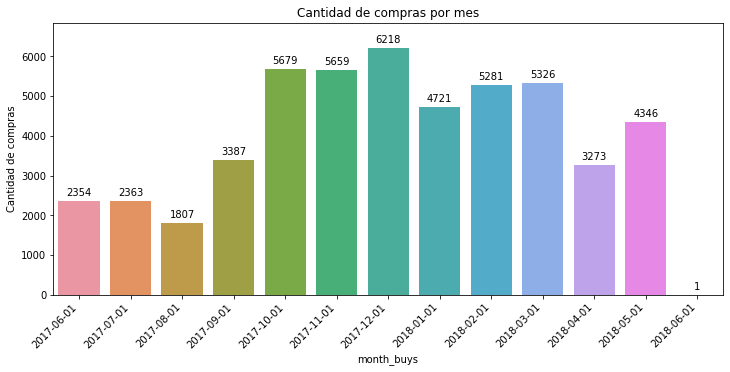

In [172]:
# creamos una gráfica de barras para observar la cantidad de compras realizadas mes a mes
f,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=total_pedidos_month, x= total_pedidos_month.index.astype(str), y='count')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 3
    label = "{:.0f}".format(y_value)
    ax.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va='bottom')     
plt.ylim(0, total_pedidos_month['count'].max()*1.1)
plt.title('Cantidad de compras por mes')
plt.ylabel('Cantidad de compras')
plt.xticks(rotation=45, ha='right')
plt.show()

**conclusion intermedia**
- Con esto logramos obtener cuantos pedidos se realizan por fecha y podemos observar que la mayor cantidad de pedidos se realizaron en diciembre del 2017
- El mes con menos pedidos fue en junio del 2018


### ¿Cuál es el tamaño promedió de compra?

In [173]:
# creamos las cohortes mensuales por su mes de compra
registers_data['month_for_buys'] = registers_data['date_for_buys'].astype('datetime64[M]')
registers_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys,days_order,cohorte_days,month_for_buys
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,0 dias,2017-06-01


In [174]:
purchase = registers_data.groupby(['month_for_buys','month_buys']).agg(median= ('revenue','median')).reset_index()
purchase.head(1)

,month_for_buys,month_buys,median
0,2017-06-01,2017-06-01,2.44


In [175]:
# calculamos los meses que han transcurrido desde su primera compra hasta el pedido actual
purchase['age_month'] = (purchase['month_buys'] - purchase['month_for_buys'])/np.timedelta64(1,'M')
purchase['age_month'] = purchase['age_month'].round().astype(int)

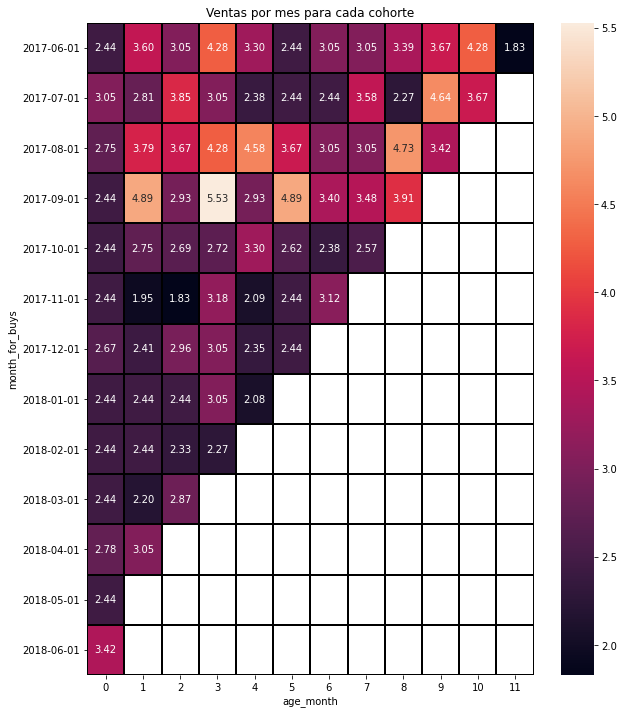

In [176]:
# calculamos las ventas promedio mensuales para cada cohorte
pur = purchase.pivot_table(index= 'month_for_buys', columns='age_month', values='median', aggfunc='mean')
pur.fillna('')

pur.index = pur.index.astype(str)
plt.figure(figsize=(10,12))
plt.title('Ventas por mes para cada cohorte')
ax = sns.heatmap(pur, annot=True, fmt='.2f', linecolor='black', linewidths=1) 
plt.show()

In [177]:
# obtenemos la cantidad de compradores y el total de las compras
revenue = registers_data.groupby('cohorte_days').agg(count = ('uid','count'), sum = ('revenue','sum'), mean = ('revenue','mean'))\
                                .sort_values(by='mean', ascending=False)
revenue

,count,sum,mean
cohorte_days,,,
mas de 4 dias,12492,76018.89,6.085406
4 dias,757,4475.40,5.912021
2 dias,1154,6401.00,5.546794
1 dias,2971,14804.82,4.983110
3 dias,707,3284.34,4.645460
0 dias,32334,147072.75,4.548548


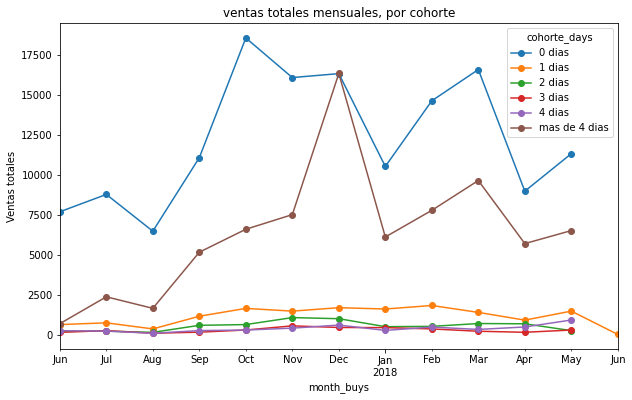

In [178]:
# creamos un gráfico para mostrar las ventas totales por mes y cohorte de conversión
coho = registers_data[['cohorte_days', 'month_buys', 'revenue']]\
            .pivot_table(index= 'month_buys', columns= 'cohorte_days', values= 'revenue', aggfunc='sum')\
            .plot(style='o-', figsize=(10,6))
plt.ylabel('Ventas totales')
plt.title('ventas totales mensuales, por cohorte')
plt.show()

**conclusión intermedia**
- Notamos que el total promedio gastado en cada compra es mayor para los usuarios que realizaron su primera compra después de cuatro días, y que es menor para los usuarios que realizaron su primera compra el mismo día de su registro.
- Podemos notar también que las ventas totales y la cantidad de compras realizadas por los usuarios que realizaron su primera compra en el mismo día de su registro es mayor. Le sigue en orden de importancia los usuarios que realizaron su primera compra después de cuatro días de su registro.

### ¿Cuánto dinero traen? (LTV)

In [179]:
# mostraremos nuestra dataframe de lo registros.
registers_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,one_user_registre,date_for_buys,days_order,cohorte_days,month_for_buys
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,0 dias,2017-06-01


In [180]:
# obtengamos el tamaño de las cohortes mensuales en base a la fecha de su primera compra
cohort_age = registers_data.groupby('month_for_buys').agg(buys_n = ('uid','nunique'))
cohort_age.head(1)

,buys_n
month_for_buys,
2017-06-01,2023


In [181]:
coho_revenue = registers_data.groupby(['month_for_buys','month_buys']).agg(revenue = ('revenue','sum')).reset_index()
coho_revenue.head(1)

,month_for_buys,month_buys,revenue
0,2017-06-01,2017-06-01,9557.49


In [182]:
# agregamos ahora el tamaño de los cohortes con su ventas totales por mes
pedidos_for = pd.merge(coho_revenue, cohort_age, on= 'month_for_buys')
pedidos_for.head(1)

,month_for_buys,month_buys,revenue,buys_n
0,2017-06-01,2017-06-01,9557.49,2023


In [183]:
# obtengamos el beneficio bruto de cada cohorte
margin_rate = 1
pedidos_for['benef_coho_brut'] = pedidos_for['revenue'] * margin_rate
pedidos_for.head(1)

,month_for_buys,month_buys,revenue,buys_n,benef_coho_brut
0,2017-06-01,2017-06-01,9557.49,2023,9557.49


In [184]:
# obtengamos la edad de cada cohorte en meses
pedidos_for['age_coho'] = (pedidos_for['month_buys'] - pedidos_for['month_for_buys'])/np.timedelta64(1,'M')
pedidos_for['age_coho'] = pedidos_for['age_coho'].round().astype('int')
pedidos_for.head(1)

,month_for_buys,month_buys,revenue,buys_n,benef_coho_brut,age_coho
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0


In [185]:
# obtengamos el LTV
pedidos_for['lifetime_value'] = pedidos_for['benef_coho_brut'] / pedidos_for['buys_n']
pedidos_for.head(1)

,month_for_buys,month_buys,revenue,buys_n,benef_coho_brut,age_coho,lifetime_value
0,2017-06-01,2017-06-01,9557.49,2023,9557.49,0,4.724414


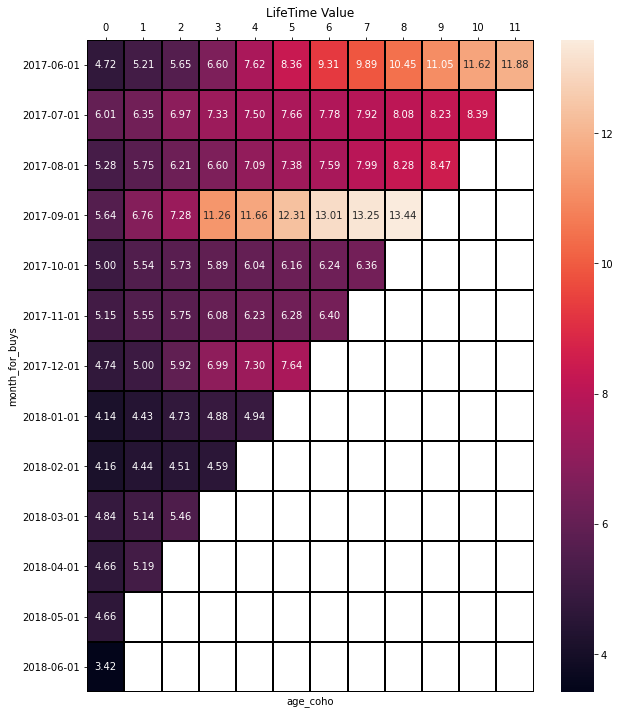

In [186]:
# obtengamos el LTV de cada cohorte por medio de una tabla
put = pedidos_for.pivot_table(index='month_for_buys', columns='age_coho', values= 'lifetime_value', aggfunc='sum').cumsum(axis=1)
put.fillna('')

put.index = put.index.astype(str)
plt.figure(figsize=(10,12))
plt.title('LifeTime Value')
ax = sns.heatmap(put, annot=True, fmt='.2f', linecolor='black', linewidths=1) 
ax.xaxis.tick_top()
plt.show()

**conclusión promedio**
- En promedio, para la cohorte '2017-06-01' cada cliente generó 11.87 en ingresos durante su ciclo de vida de doce meses. Sin embargo, la cohorte que generó ingresos promedio por cliente más altos fue '2017-09-01' con 13.44, durante sus nueve meses de vida.

## Informes y métricas de marketing.

### ¿Cuánto dinero se gasto? 

In [187]:
# veamos nuestra tabala de costos 
costs_data.head(1)

,source_id,dt,costs
0,1,2017-06-01,75.2


In [188]:

# obtenemos el mes correspondiente a la fecha de gastos en marketing
costs_data['month_mark'] = costs_data['dt'].astype('datetime64[M]')
costs_data.head(1)

,source_id,dt,costs,month_mark
0,1,2017-06-01,75.2,2017-06-01


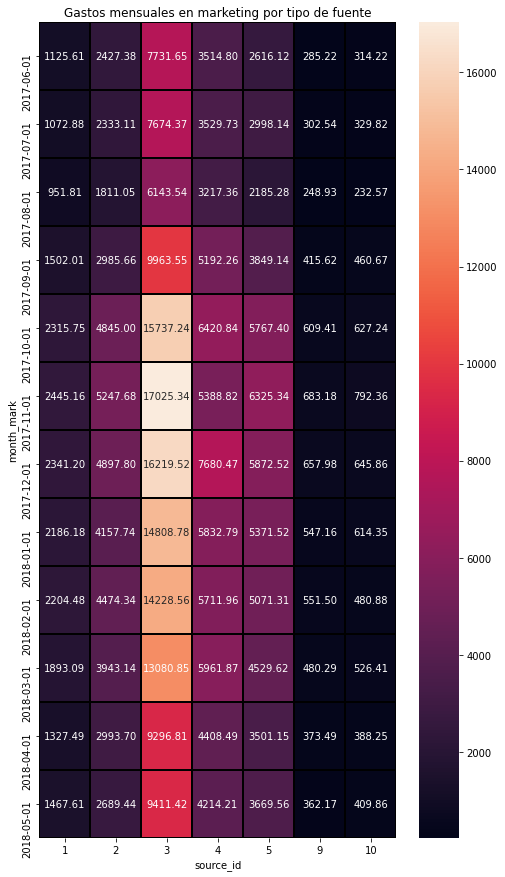

In [189]:
costs = costs_data.pivot_table(index= 'month_mark', columns= 'source_id', values= 'costs', aggfunc='sum')

costs.index = costs.index.astype(str)
plt.figure(figsize=(8,15))
plt.title('Gastos mensuales en marketing por tipo de fuente')
ax = sns.heatmap(costs, annot=True, fmt='.2f', linecolor='black', linewidths= 1)
plt.show()

In [190]:
# mostramos los gastos totales por tipo de fuente
costs.sum().sort_index(ascending=False)

source_id
10      5822.49
9       5517.49
5      51757.10
4      61073.60
3     141321.63
2      42806.04
1      20833.27
dtype: float64

In [191]:
# mostramos los gastos totales mensuales
costs.sum(axis=1).sort_index(ascending=False)

month_mark
2018-05-01    22224.27
2018-04-01    22289.38
2018-03-01    30415.27
2018-02-01    32723.03
2018-01-01    33518.52
2017-12-01    38315.35
2017-11-01    37907.88
2017-10-01    36322.88
2017-09-01    24368.91
2017-08-01    14790.54
2017-07-01    18240.59
2017-06-01    18015.00
dtype: float64

**Conclusión intermedia**
- podemos observar que la fuente numero 3 fue la que tuvo mayor costo de marketing comparado con la fuente tipo 9 y 10.
- y con los gastos mensuales, en octubre de 2017 a marzo del 2018 se hicieron los mayores gastos en marketing.

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [192]:
# veamos nuestra tabala de clientes.
visits_data.head(1)

,device,end_ts,source_id,start_ts,uid,day,week,month,date,duracion_seg
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-14,2017-12-01,2017-12-20,1080


In [193]:
# obtenemos para cada usuario la fecha de su primera visita
one_visits = visits_data.groupby('uid').agg(one_session_start = ('start_ts','min')).reset_index()
one_visits.head(1)

,uid,one_session_start
0,11863502262781,2018-03-01 17:27:00


In [194]:
# obtenemos la fecha y el mes de cada primera sesion
one_visits['session_dt'] = one_visits['one_session_start'].dt.date
one_visits['session_month'] = one_visits['one_session_start'].astype('datetime64[M]')
one_visits.head(1)

,uid,one_session_start,session_dt,session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01


In [195]:
# agregamos los datos de las primeras visitas para cada usuario al dataframe de las visitas
total_visits = visits_data.merge(one_visits, on='uid')
total_visits.head(1)

,device,end_ts,source_id,start_ts,uid,day,week,month,date,duracion_seg,one_session_start,session_dt,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01


In [196]:
# obtenemos la edad en meses entre la visita actual y la primera visita
total_visits['age_month'] = ((total_visits['month'] - total_visits['session_month']) / np.timedelta64(1,'M')).round().astype('int')
total_visits.head(1)

,device,end_ts,source_id,start_ts,uid,day,week,month,date,duracion_seg,one_session_start,session_dt,session_month,age_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,2017-12-14,2017-12-01,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0


In [197]:
# Veamos el dataframe con los pedidos 
orders_data.head(1)

,buy_ts,revenue,uid,date_buys,month_buys
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01


In [198]:
# Vamos a obtener por cada usuario la fecha de su primer pedido
one_orders = pedidos.groupby('uid').agg(order_ts = ('buy_ts','min')).reset_index()
one_orders.head(1)

,uid,order_ts
0,313578113262317,2018-01-03 21:51:00


In [199]:
# para la primera compra realizada vamos a obtener la fecha
one_orders['order_for_date'] = one_orders['order_ts'].dt.date
one_orders['order_for_month'] = one_orders['order_ts'].astype('datetime64[M]')

In [200]:
# crearemos un dataframe que contiene los datos de las primera visitas y las primeras compras
one_visit_orders = one_visits.merge(one_orders, on='uid')


In [201]:
# para cada comprador obtenemos los dias entre la primer visita y su primera compra
one_visit_orders['order_for_date'] = pd.to_datetime(one_visit_orders['order_for_date'])
one_visit_orders['session_dt'] = pd.to_datetime(one_visit_orders['session_dt'])
one_visit_orders['days_for_purchase'] = ((one_visit_orders['order_ts'] - one_visit_orders['one_session_start']) / np.timedelta64(1,'D')).astype('int')
one_visit_orders.head(1)

,uid,one_session_start,session_dt,session_month,order_ts,order_for_date,order_for_month,days_for_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106


In [202]:
# veamos el dataframe de costos.
costs_data.head(1)

,source_id,dt,costs,month_mark
0,1,2017-06-01,75.2,2017-06-01


In [203]:
usuarios = total_visits.sort_values('start_ts').groupby('uid').first()
usuarios = usuarios[['source_id']]

In [204]:
one_visit_orders = one_visit_orders.merge(usuarios, on = 'uid')
one_visit_orders.head(1)

,uid,one_session_start,session_dt,session_month,order_ts,order_for_date,order_for_month,days_for_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2


In [205]:
# usando el dataframe 'buyers' vamos a calcular el numero de compradores para cada 'source_id' y fecha de la primera compra
orders_visit = one_visit_orders.groupby(['source_id', 'order_for_month']).agg(n_buys = ('uid','count')).reset_index()
orders_visit['order_for_month'] = pd.to_datetime(orders_visit['order_for_month'])
orders_visit.head(1)

,source_id,order_for_month,n_buys
0,1,2017-06-01,190


In [207]:
# unimos ahora los costos de marketing con 
costs_for_marketing = pd.merge(orders_visit, costs_data, left_on =['source_id', 'order_for_month'], right_on =['source_id', 'dt'])
costs_for_marketing['cac'] = costs_for_marketing['costs'] / costs_for_marketing['n_buys']
costs_for_marketing.groupby('source_id').agg({'cac': 'mean'}).round(1).sort_values(by = 'cac', ascending=False)

,cac
source_id,
3,0.5
2,0.4
1,0.2
5,0.2
9,0.2
10,0.2
4,0.1


In [218]:
orders_visit = one_visit_orders.groupby(['source_id', 'order_for_date']).agg(n_buys = ('uid','count')).reset_index()
orders_visit['order_for_date'] = pd.to_datetime(orders_visit['order_for_date'])
orders_visit.head(1)

,source_id,order_for_date,n_buys
0,1,2017-06-01,14


In [219]:
costs_for_marketing = pd.merge(orders_visit, costs_data, left_on =['source_id', 'order_for_date'], right_on =['source_id', 'dt'])
costs_for_marketing['cac'] = costs_for_marketing['costs'] / costs_for_marketing['n_buys']
costs_for_marketing.groupby('source_id').agg({'cac': 'mean'}).round(1).sort_values(by = 'cac', ascending=False)

,cac
source_id,
2,16.3
3,15.6
1,9.5
5,8.3
4,7.3
9,6.8
10,6.6


**conclusión intermedia**
- Las fuentes 2 y 3, son las fuentes con los costos por clientes más altos, mientras que las fuentes 9 y 10 son las que tienen los costos por clientes más bajos.

### ¿Cuán rentables eran las inversiones? (ROMI)

In [231]:
costs_for_marketing.head(1)

,source_id,order_for_date,n_buys,dt,costs,month_mark,cac
0,1,2017-06-01,14,2017-06-01,75.2,2017-06-01,5.371429


In [232]:
orders_source = orders_data.merge(usuarios, on='uid')
orders_source.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,source_id
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,1


In [233]:
# obtengamos la fecha de la primera compra
order_dt = orders_source.groupby('uid').agg(order_for_month = ('month_buys','min'))
order_dt.head(1)

,order_for_month
uid,
313578113262317,2018-01-01


In [234]:
# unimos la  fecha de la primera compra al dataframe orders_user
orders_source = orders_source.merge(order_dt, on='uid')
orders_source.head(1)

,buy_ts,revenue,uid,date_buys,month_buys,source_id,order_for_month
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01,1,2017-06-01


In [235]:
# obtenemos las ventas para cada tipo de fuente segun la fecha de compra
source = orders_source.groupby(['source_id', 'order_for_month']).agg(revenue =('revenue','sum')).reset_index()
source.head(1)

,source_id,order_for_month,revenue
0,1,2017-06-01,6392.39


In [237]:
# revisamos el tamaño de 'revenue_source' y las caracteristicas de la columna 'order_for_date'
source['order_for_month'].describe(datetime_is_numeric=True)

count                               86
mean     2017-11-16 15:20:55.813953536
min                2017-06-01 00:00:00
25%                2017-08-08 18:00:00
50%                2017-11-16 00:00:00
75%                2018-02-22 00:00:00
max                2018-06-01 00:00:00
Name: order_for_month, dtype: object

In [240]:
# agruparemos por fuente y obtenemos las ventas totales y los costos de marketing
grouped['order_for_month'].describe(datetime_is_numeric=True)

count                             2433
mean     2017-11-15 10:16:43.205918720
min                2017-06-01 00:00:00
25%                2017-09-01 00:00:00
50%                2017-11-01 00:00:00
75%                2018-02-01 00:00:00
max                2018-05-01 00:00:00
Name: order_for_month, dtype: object

In [241]:
grouped_source = grouped.groupby('source_id').agg(total_revenue= ('revenue','sum'), total_costs=('costs','sum'))
grouped_source

,total_revenue,total_costs
source_id,,
1,933026.76,20785.41
2,1429009.55,42777.37
3,1648885.41,141321.63
4,1708426.43,61057.91
5,1592598.00,51756.40
9,149325.21,4775.16
10,122703.96,5351.94


In [242]:
# calculamos el 'romi' por fuente según lo anterior
grouped_source['romi'] = grouped_source['total_revenue'] / grouped_source['total_costs']
grouped_source

,total_revenue,total_costs,romi
source_id,,,
1,933026.76,20785.41,44.888542
2,1429009.55,42777.37,33.405736
3,1648885.41,141321.63,11.667608
4,1708426.43,61057.91,27.980428
5,1592598.00,51756.40,30.771035
9,149325.21,4775.16,31.271247
10,122703.96,5351.94,22.927006


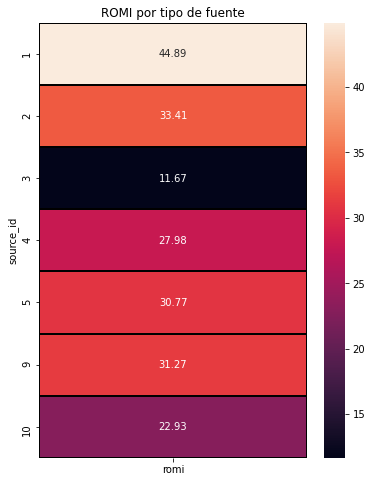

In [243]:
# crearemos un heatmap para observar mejor.
plt.figure(figsize=(6,8))
plt.title('ROMI por tipo de fuente')
ax = sns.heatmap(grouped_source[['romi']], annot=True, fmt='.2f', linecolor='black', linewidths=1)
plt.show()

## Conclusión.
- tenemos que la aplicación es usada
    - diariamente por 908 personas (DAU)
    - semanalmente por 5.725 personas (WAU)
    - mensualmente por 23,229 personas (MAU).
    
- La aplicación la inician
    - diariamente 988 sesiones
    - semanalmente 6,782 sesiones
    - mensualmente 29,950 sesiones.
    
- La duración promedio de una sesión es de 60 segundos. 
- El factor de adherencia nos indica que un 16% de los usuarios vuelven a usar la aplicación semanalmente y que mensualmente un 4%.
- En promedio transcurren diecisiete días entre que un usuario se registra a la plataforma y su primer pedido.
- El 75% de los pedidos se realizan en los primeros cuatro días después que un usuario se registra
- Los usuarios que realizan su primera compra el mismo día de su registro realizan aproximadamente un 64% de las compras. El 25% de las compras es realizada por los usuarios que realizan su primera compra después de cuatro días de su registro. Mientras que las usuarios que realizan su primera compra entre el primer y cuarta día posterior a su registro, son solo el 11% de las compras.
- Del mes de septiembre del 2017 a mayo del 2018 son los meses donde hubo una gran cantidad de compras. Mientras que de junio a agosto del 2017 se registro la menor cantidad de compras.
- El total de las ventas mensuales por cohorte es mayor para los usuarios cuya primera compra la realizaron el mismo dia de su registro. Estas ventas representan el 64% de las ventas realizadas y un 58% del volumen de las ventas totales.
- s cohortes mensuales más antiguas tuvieron pocos compradores, las cohortes intermedias mostraron un incremento y las cohortes más recientes muestran una disminución en la cantidad de compradores.
- la fuente tipo '3' tuvo el mayor gasto en marketing
- Las fuentes tipo '9' y '10' son las fuentes con los menores gastos. 
- En cuanto a los gastos mensuales, de los meses de octubre de 2017 a marzo del 2018 se hicieron los mayores gastos en marketing.
- Los tipos de fuentes: 2 y 3, son las fuentes con los costos por cliente más altos, mientras que las fuentes tipo 9 y 10 son las que tienen los costos por cliente más bajos.
- Hasta el momento las inversiones en marketing no han sido rentables para los tipos de fuentes 3, 4 y 10. Para los tipos de fuentes 1, 2, 5 y 9, las inversiones en marketing ya son rentables. Siendo la fuente tipo 1 la de mayor rentabilidad.